In [1]:
import numpy as np
import theano
import theano.tensor as T
import lasagne
import matplotlib.pyplot as plt
from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool
import time
%matplotlib inline
%run ../SNN.ipynb

<function fixed_frequency_spike_train at 0x10b33bcf8>


In [2]:
from mnist import load_dataset
X_train,y_train,X_val,y_val,X_test,y_test = load_dataset()

In [3]:
input_X = T.tensor4("X")
input_shape = [None,1,28,28]
target_y = T.vector("target Y integer",dtype='int32')

In [4]:
input_layer = lasagne.layers.InputLayer(shape = input_shape,input_var=input_X)

dense_1 = lasagne.layers.DenseLayer(input_layer, num_units=128, 
                                    nonlinearity=lasagne.nonlinearities.rectify,
                                   name='dense_1', b=None)

dense_2 = lasagne.layers.DenseLayer(dense_1, num_units=256, 
                                    nonlinearity=lasagne.nonlinearities.sigmoid,
                                   name='dense_2', b=None)

dense_3 = lasagne.layers.DenseLayer(dense_2, num_units=64, 
                                    nonlinearity=lasagne.nonlinearities.rectify,
                                   name='dense_2', b=None)

dense_output = lasagne.layers.DenseLayer(dense_3, num_units = 10,
                                        nonlinearity = lasagne.nonlinearities.softmax,
                                        name='output', b=None)

In [5]:
with np.load('dense_weights.npz') as f: 
    param_values = [f['arr_%d' % i]*10 for i in range(len(f.files))] 
    for i in param_values[-1]:
        for j in i:
            j = abs(j)
    for i in param_values:
        for j in i:
            for k, n in enumerate(j):
                if(n < 0.000001):
                    j[k] = 0.0

    
lasagne.layers.set_all_param_values(dense_output, param_values)

In [26]:
spiking_net = spiking_from_lasagne(dense_output, 1.375)
print(spiking_net.get_output_for(X_train[1], 39))

[[27, 34, 36, 38], [28], [27, 36, 38], [27, 31, 38], [28, 38], [29, 34, 37], [28, 36, 38], [27, 36], [28, 36, 38], [28, 38]]


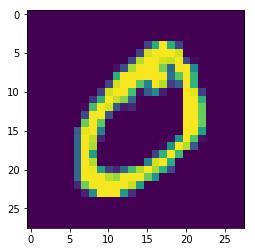

In [21]:
plt.imshow(X_train[1, 0])